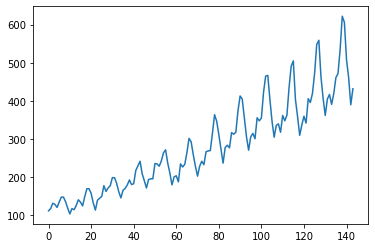

In [82]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


df = sns.load_dataset('flights')
p = df['passengers'].plot()

In [88]:
for i in range(12):
    print(np.exp(-(i - 10)**2/(2 * 2)))

1.3887943864964021e-11
1.6052280551856116e-09
1.1253517471925912e-07
4.785117392129009e-06
0.00012340980408667956
0.0019304541362277093
0.01831563888873418
0.10539922456186433
0.36787944117144233
0.7788007830714049
1.0
0.7788007830714049


In [83]:
def rbf(x, width, month, freq=12):
    return np.exp(-(x % freq - month)**2/(2 * width))

In [86]:
x = np.arange(144, dtype=np.float32)
y = rbf(x, width=2.0, month=10)

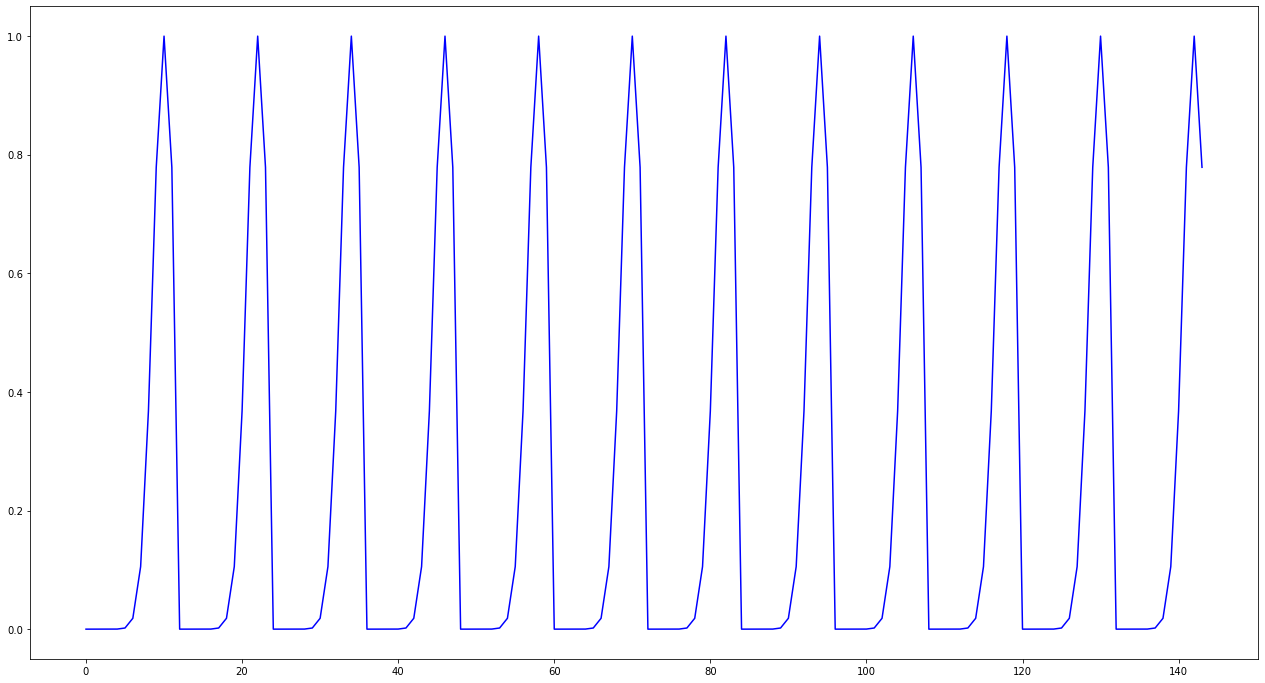

In [87]:
plt.figure(figsize=(22,12))
plt.plot(x, y, 'b-')

In [89]:
for month in range(12):
    df[f'month{month}'] = rbf(x, width=2.0, month=month)

In [90]:
df.head()

,year,month,passengers,month0,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11
0,1949,January,112,1.000000,0.778801,0.367879,0.105399,0.018316,0.001930,0.000123,0.000005,1.125352e-07,1.605228e-09,1.388794e-11,7.287724e-14
1,1949,February,118,0.778801,1.000000,0.778801,0.367879,0.105399,0.018316,0.001930,0.000123,4.785117e-06,1.125352e-07,1.605228e-09,1.388794e-11
2,1949,March,132,0.367879,0.778801,1.000000,0.778801,0.367879,0.105399,0.018316,0.001930,1.234098e-04,4.785117e-06,1.125352e-07,1.605228e-09
3,1949,April,129,0.105399,0.367879,0.778801,1.000000,0.778801,0.367879,0.105399,0.018316,1.930454e-03,1.234098e-04,4.785117e-06,1.125352e-07
4,1949,May,121,0.018316,0.105399,0.367879,0.778801,1.000000,0.778801,0.367879,0.105399,1.831564e-02,1.930454e-03,1.234098e-04,4.785117e-06


In [91]:
df['x'] = x

In [92]:
from sklearn.linear_model import LinearRegression
X = df.iloc[:, 3:]
y = df['passengers']
m = LinearRegression().fit(X, y)
ypred = m.predict(X)

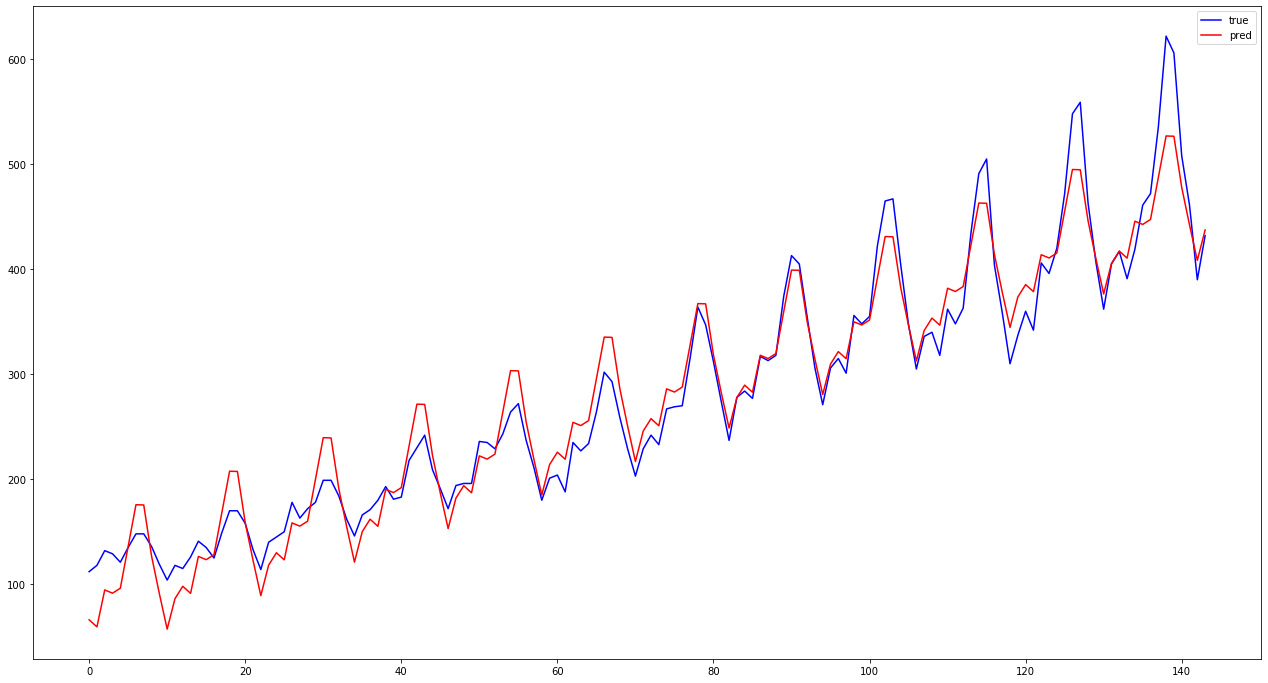

In [93]:
plt.figure(figsize=(22,12))
plt.plot(x, y, 'b-')
plt.plot(x, ypred, 'r-')
plt.legend(['true', 'pred'])

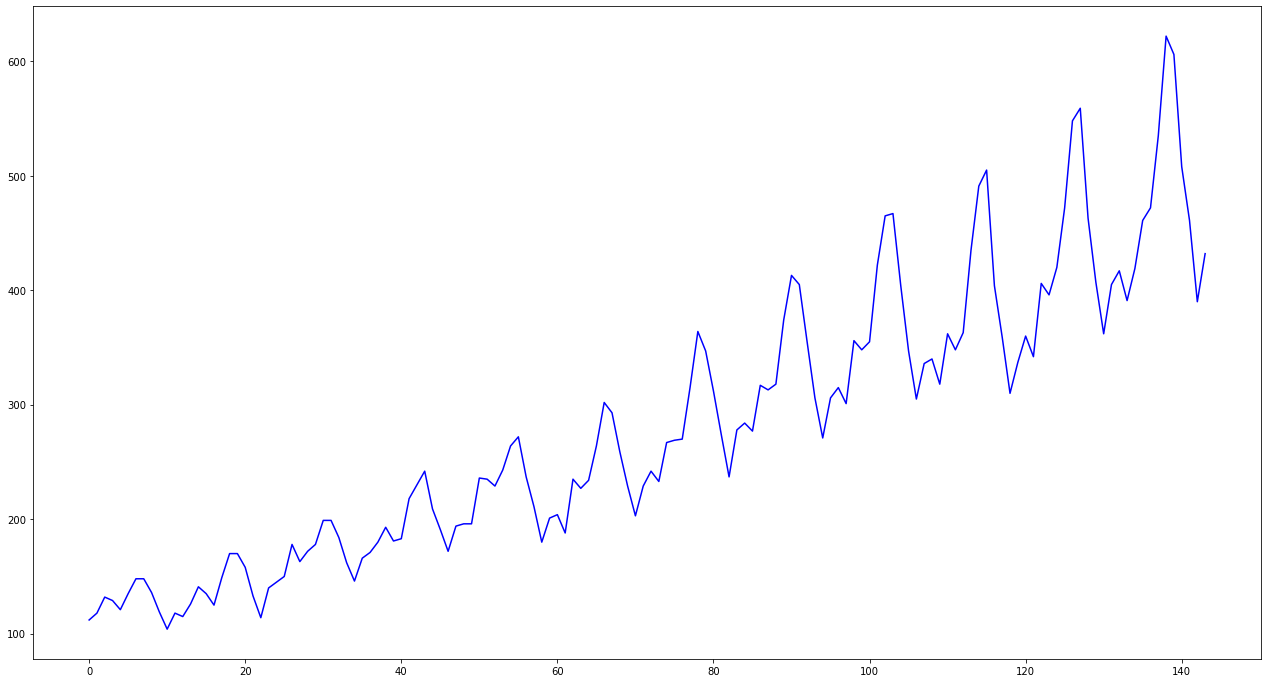

In [45]:
plt.figure(figsize=(22,12))
plt.plot(x, y, 'b-')